# Topic Modeling for Hotel Reviews: Unsupervised Learning Approach
This notebook presents an unsupervised learning approach to topic modeling for hotel reviews. Our goal is to automatically categorize reviews as positive or negative based on their content, without relying on pre-labeled data.

## Project Overview
In this project we will analyze a dataset of hotel reviews using NLP and unsupervised ML techniques. The project is divided into the following sections.
### 1. Exploritory Data Analysis (EDA)
  - Word length distribution
  - Text preprocessing
### 2. Feature Engineering
  - Term Frequency-Inverse Document Frequency (TF-IDF) vectorization
  - Identify and analyze word pairs
### 3. Topic Modeling
  - Non-negative Matrix Factorization (NMF) for topic extraction
  - K-means clustering for topic extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path
data_path = Path.cwd() / 'tripadvisor_hotel_reviews.csv'

# EDA
I am going to load in the datframe, check some basic statistics such as number of reviews, null values, and distribution of text length. Then I am going to look through a few sample reviews to get a sense of what the reviews look like

In [3]:
df = pd.read_csv(data_path)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
def view_random_text(df):
    idx = np.random.randint(len(df))
    print(df['Review'].iloc[idx])

In [6]:
view_random_text(df)

wonderful vacation wife spent week punta cana princess n't enjoyed, asked room king size bed none available day arrived, jose maria excellent help desk gave great room overlooking ocean king bed day 2. food excellent different choose, tried tex mex steakhouse mare nostrum mexican restaurant caribe club good especially mixed grill mare nostrum, beach beautiful market beach excellent getting souvenirs, wife bought paintings jewlery good price, bartering 75 offer, usually meet 60, excursion took speedboat/snorkel cruise excellent, english speaking couple trip tour guide duration snorkelling session, certainly not hesitate pcp, truly excellent vacation,  


In [7]:

view_random_text(df)

great place stay stayed simpsons nights, friendly welcome great advice, room comfortable public rooms character, good breakfast, loved walk city botanical gardens took 15 minutes stay area sydney miss stayed city hotel, interesting places eat nearby, highly recommended fun better value large corporate hotel,  


In [8]:

view_random_text(df)

friendly staff good resuraunt nice room liked hotel, not centre easy tram taxi walk town, little way mea n't saw areas way problem hotel situated nice quite residential area.the staff helpful checked room ready early allowed check early responded request provided local information map.the room comfortable clean apples left bed nice touch, speaks english sign annoyance.the food resturaunt best years service little slow.breakfast expensive nice.i recommend hotel,  


Looks like the text is already lowercase, there are some special characters that will need to be cleaned. Additionally there appear to be misspellings that could make things difficult. In the data cleaning, I will have to remove all punctuation and special characters.

In [9]:

def plot_text_length_histogram(word_length, bins=50):

    mean_length = np.mean(word_length)
    median_length = np.median(word_length)

    plt.figure(figsize=(12, 6))
    sns.histplot(data=word_length, bins=bins)

    plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
    plt.axvline(median_length, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_length:.2f}')

    plt.title('Distribution of Text Lengths (Word Count)', fontsize=16)
    plt.xlabel('Number of Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.show()

    print(f"Mean word count: {mean_length:.2f}")
    print(f"Median word count: {median_length:.2f}")
    print(f"Minimum word count: {np.min(word_length)}")
    print(f"Maximum word count: {np.max(word_length)}")


## Word length
I want to get a sense of the text length in each of these samples. If they are really small then maybe something simple could work, if they are long maybe I need to rethink my entire approach.

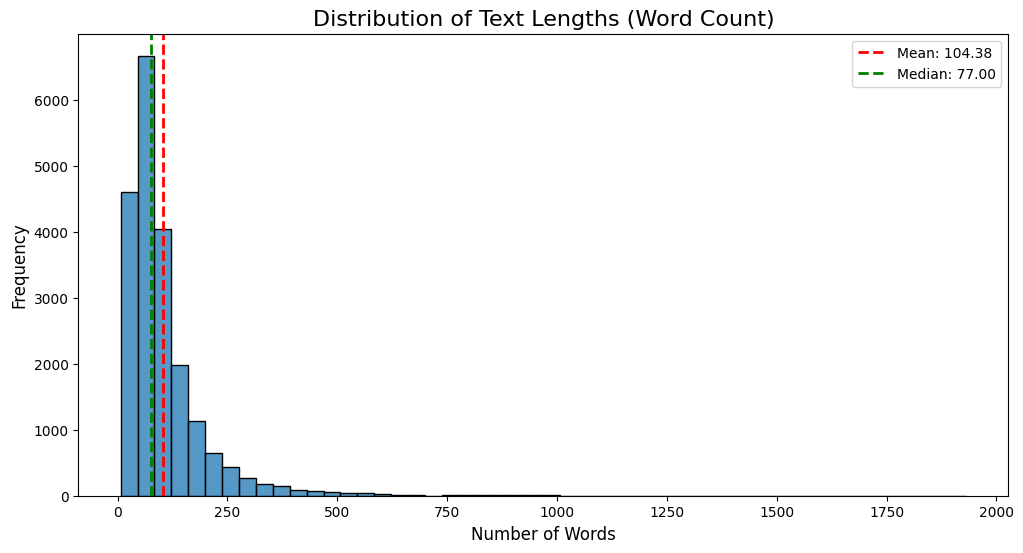

Mean word count: 104.38
Median word count: 77.00
Minimum word count: 7
Maximum word count: 1931


In [10]:

word_length = df["Review"].apply(lambda x: len(str(x).split())).to_numpy()
plot_text_length_histogram(word_length)

Word count seems to be fairly reasonable, I'm going to do some data cleaning to see if it can be reduced a little more before trying to embed or vectorize it.

# Data Cleaning
We saw from viewing the samples that there are special characters that need to be removed, we will use regex to replace these. Additionally, I'lll use the nltk library to remove stopwords and lemmatize the text.

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    cleaned_text = ' '.join(tokens)

    return cleaned_text

df['clean_text'] = df['Review'].apply(lambda x: preprocess_text(x))

In [13]:

def view_random_text_cleaned(df):
    idx = np.random.randint(len(df))
    print('=' * 32)
    print('Original Text:')
    print(df['Review'].iloc[idx])
    print('-' * 32)
    print('Processed Text:')
    print(df['clean_text'].iloc[idx])

### Manual review
Just spot checking some samples to verify the preprocessing

In [14]:
view_random_text_cleaned(df)

Original Text:
place rocks, wow, awesome hotel staff, february 4-8.both ricky mark went way meet need, arrival ricky took time map vieques best places check, rented scooter hotel ran great rough booty gravelly beach roads asked switch car magically hooked vehicle, stayed room 12 best view, shower hot room clean, felt comfortable leaving valuables room housekeeping staff trustworthy, general felt safe rest island.the convenience store godsend, man needed pair water shoes snorkeling size, snacks staples variety beverages sale free coffee morning guests, guys running top-notch establishment deserves rave reviews gets, thanks ricky mark stay vieques extra memorable definitely did day kayaking tour abe, clients day gave best tour, knowledgeable tells little details mangrove canals actually kayaked, biobay learned, went private beach snorkeled ate dinner provided abe good bili highly recommended headed biobay nightfall check amazing illuminating spectacle microorganisms really glow, abe pers

In [15]:

view_random_text_cleaned(df)

Original Text:
good hotel small budget stayed 4 nights double shared bathroom, room small clean cosy, outside bathroom clean wait use it.staff speak english helpful.you leave bags check-in 3pm check 12pm peletier metro 2mins walk awayhard rock cafe 5 mins away,  
--------------------------------
Processed Text:
good hotel small budget stayed night double shared bathroom room small clean cosy outside bathroom clean wait use itstaff speak english helpfulyou leave bag checkin pm check pm peletier metro min walk awayhard rock cafe min away


processing seems to be effective, going to look at what this did to the word length

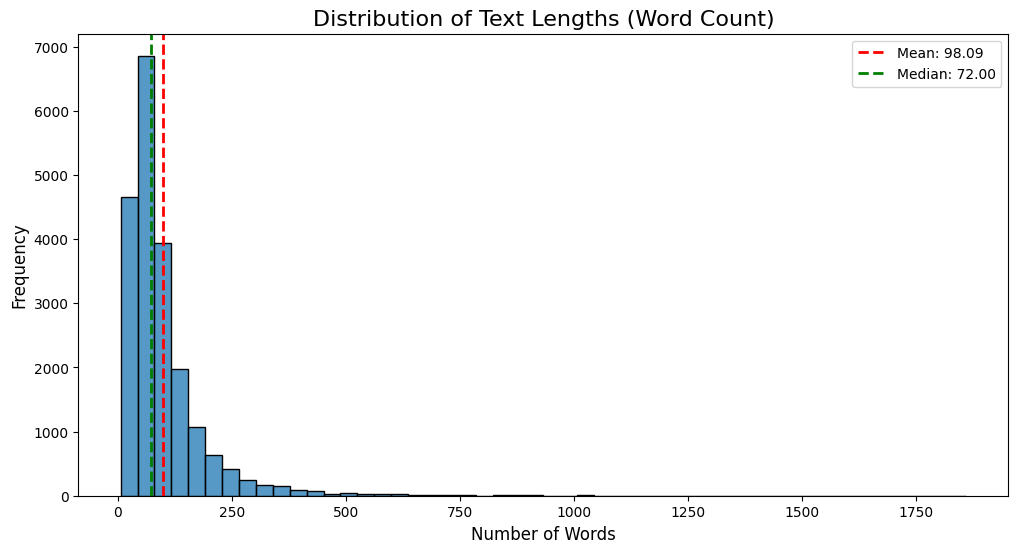

Mean word count: 98.09
Median word count: 72.00
Minimum word count: 6
Maximum word count: 1861


In [16]:

word_length = df["clean_text"].apply(lambda x: len(str(x).split())).to_numpy()
plot_text_length_histogram(word_length)

Not a super significant change, but every little bit helps. Now I am going to start feature engineering the text and get it in a form that can be processed by a model.

# Feature Engineering

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from collections import defaultdict

In [18]:
vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=1000)

X = vectorizer.fit_transform(np.random.choice(df['clean_text'].to_numpy(), 500, replace=False))

Top 20 important words:
great location: 10.2896
great hotel: 9.1102
staff friendly: 9.0047
hotel room: 8.5362
hotel great: 8.3741
room clean: 8.3140
stayed hotel: 7.8652
room service: 7.3581
stay hotel: 7.0970
place stay: 6.9439
hotel staff: 6.8223
hotel stayed: 6.8178
highly recommend: 6.8146
staff helpful: 6.6576
ca nt: 6.3315
room nice: 5.8901
punta cana: 5.8840
definitely stay: 5.8299
th floor: 5.7343
stayed night: 5.6977


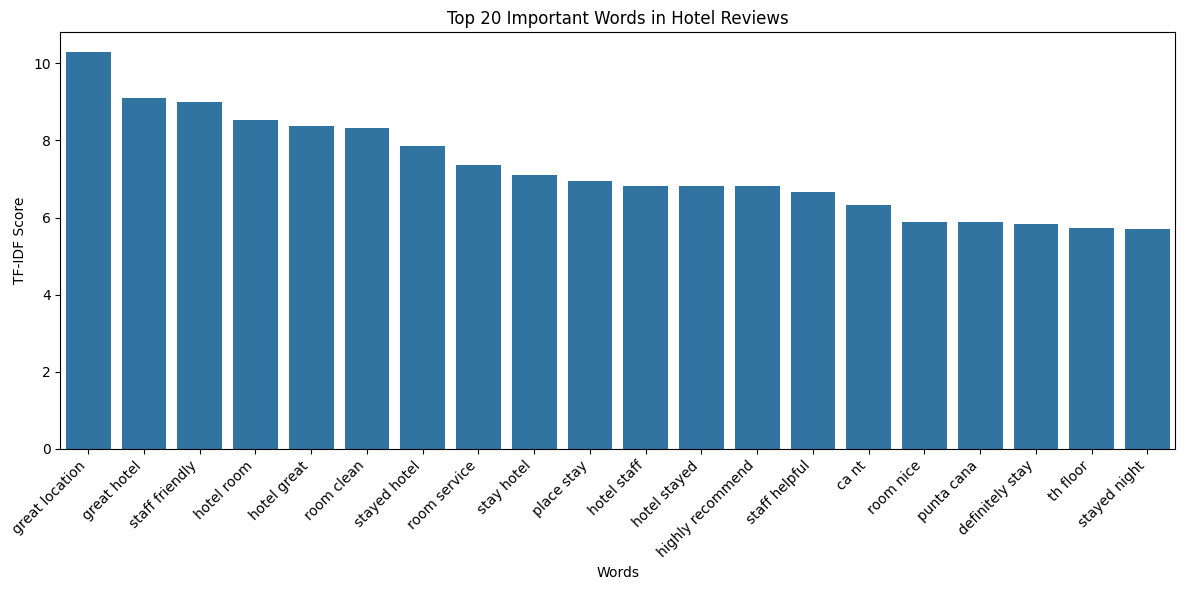


Top 5 words for review: 'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night'
[('room night', 0.3182518840033363), ('nice size', 0.3182518840033363), ('good deal', 0.3182518840033363), ('previous review', 0.30790366954072373), ('size bed', 0.2915753985719525)]


In [19]:
feature_names = vectorizer.get_feature_names_out()


word_scores = defaultdict(float)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        word_scores[feature_names[j]] += X[i, j]

sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)

print("Top 20 important words:")
for word, score in sorted_words[:20]:
    print(f"{word}: {score:.4f}")

top_words = [word for word, score in sorted_words[:20]]
top_scores = [score for word, score in sorted_words[:20]]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_words, y=top_scores)
plt.title('Top 20 Important Words in Hotel Reviews')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

def get_top_words_for_review(review_text, top_n=5):
    review_vector = vectorizer.transform([review_text])
    feature_index = review_vector.nonzero()[1]
    tfidf_scores = zip(feature_index, [review_vector[0, x] for x in feature_index])
    return sorted([(feature_names[i], s) for (i, s) in tfidf_scores], key=lambda x: x[1], reverse=True)[:top_n]

sample_review = df['clean_text'].iloc[0]
print(f"\nTop 5 words for review: '{sample_review}'")
print(get_top_words_for_review(sample_review))

The word pairs provide some good insight into the reviews. We can start to see what factors the customers care about. 'great location' 'staff friendly/helpful' 'room clean' all point towards a positive review.

# Modeling

## NMF

We will look at NMF first for trying to categorize the reviews and compare the results to the truth data for validation.

In [20]:
from sklearn.decomposition import NMF

In [21]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=2500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

In [24]:
n_topics = 2
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)

labels = np.argmax(W, axis=1)

In [25]:

label_1_mask = np.where(labels == 0, True, False)
df['Review'].to_numpy()[label_1_mask][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [26]:

label_2_mask = np.where(labels == 1, True, False)
df['Review'].to_numpy()[label_2_mask][2]

"disappointed say anticipating stay hotel monaco based reviews seen tripadvisor, definitely disppointment, decor room hotel envisioned nice, housekeeping staff impressive extremely polite cheery helpful, desk bellmen standard customer service, lots little things easily overlooked broken make mirror sagging post bathroom jiggly entrance handle room did n't feel secure handle nearly falling door, husband early morning flight mid-week asked cab called, suggested cab ride cost double private car flat-rate n't case, knew cost cab 30 car 38 bell staff insisted like 65 taxi ride, cab driver later explained bell staff kick referrals, preferred guests city and/or hotel hotel staff looking best interests, new years planned dining restaurant hotel new year day, came dressed dinner told desk closed holiday, asked nearby response good luck finding today, good luck, thanks help, feature needed hotel business centre work, downstairs service completely semi-funcitional, internet service out-sourced en

Just from the spot check here, it looks like positive reviews are label 0 and negative reviews are label 1. We will make an encoder to reflect that

0.7072373237030891


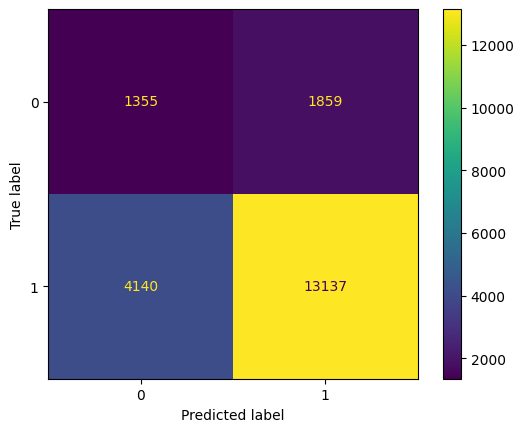

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

label_encoding = {0: 1, 1: 0}
predicted_label = np.array([label_encoding[l] for l in labels])
ratings = df['Rating'].to_numpy()
truth = np.where(ratings >= 3, 1, 0)
accuracy = accuracy_score(truth, predicted_label)
ConfusionMatrixDisplay.from_predictions(truth, predicted_label)
print(accuracy)

NMF did an okay job at categorizing, and it has provided a grouping in which there is a high density of negative reviews. At the very least this could be useful for identifying cases for manual labeling to begin building a supervised model. We will look at using K-means to see if we can get a reduction in the number of false positives

## K-means

Now we will look at K-means to cluster our data to isolate the positive/negative reviews. We will use 5 clusters to begin with to try to get a broad categorization of the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


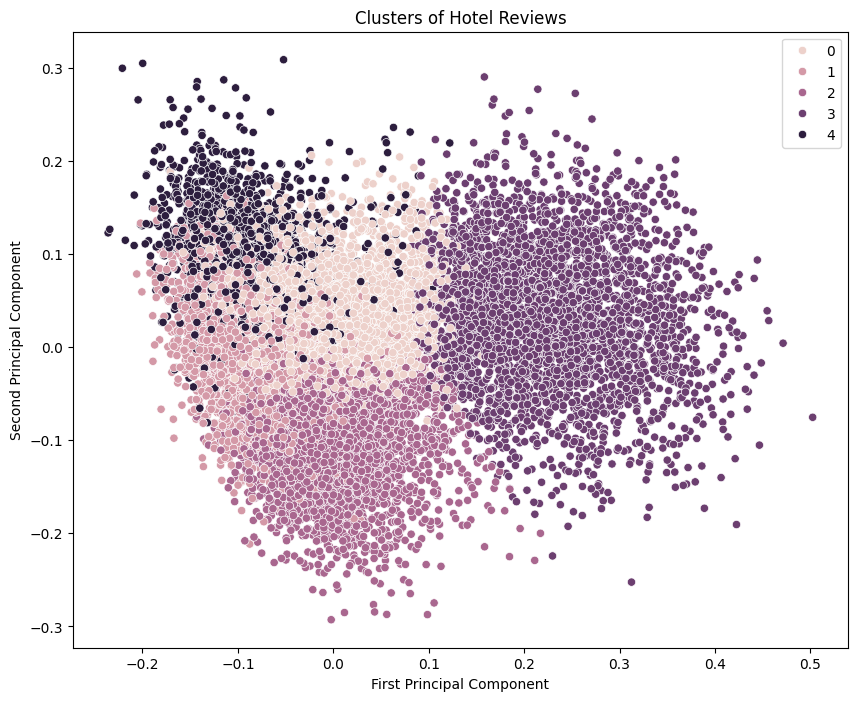


Top words for Cluster 0:
hotel, room, stay, staff, service, stayed, great, place, wonderful, time

Top words for Cluster 1:
hotel, room, good, location, walk, breakfast, station, clean, excellent, staff

Top words for Cluster 2:
room, hotel, nt, night, stay, bed, nice, floor, good, day

Top words for Cluster 3:
resort, beach, food, pool, nt, time, day, great, good, people

Top words for Cluster 4:
great, hotel, location, great location, room, staff, hotel great, stay, great hotel, clean

Sample reviews from Cluster 0:
- lovely honeymoon intimidating spending year visiting hawaii staying aunt hawaii kai honeymoon stay h...
- great great hotel fiance returned intercontinental couple day ago stayed march wonderful time matter...
- place minimalism delivers feel living paradox connecting compatible way natural surroundings housed ...

Sample reviews from Cluster 1:
- good place room clean nice view backyard location good near la rambla good comunicate little noisy d...
- booked returned w

In [29]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=2500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)


df['cluster'] = cluster_labels


pca = PCA(n_components=20)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())


plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=cluster_labels)
plt.title('Clusters of Hotel Reviews')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

feature_names = tfidf_vectorizer.get_feature_names_out()

def get_top_words_per_cluster(cluster_center, feature_names, top_n=10):
    sorted_indices = cluster_center.argsort()[::-1]
    return [feature_names[i] for i in sorted_indices[:top_n]]

for i, center in enumerate(kmeans.cluster_centers_):
    print(f"\nTop words for Cluster {i}:")
    top_words = get_top_words_per_cluster(center, feature_names)
    print(", ".join(top_words))

for i in range(n_clusters):
    print(f"\nSample reviews from Cluster {i}:")
    cluster_reviews = df[df['cluster'] == i]['clean_text'].sample(n=3, random_state=42)
    for review in cluster_reviews:
        print(f"- {review[:100]}...")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-d511ecda1774>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2_df['cluster'] = cluster_labels


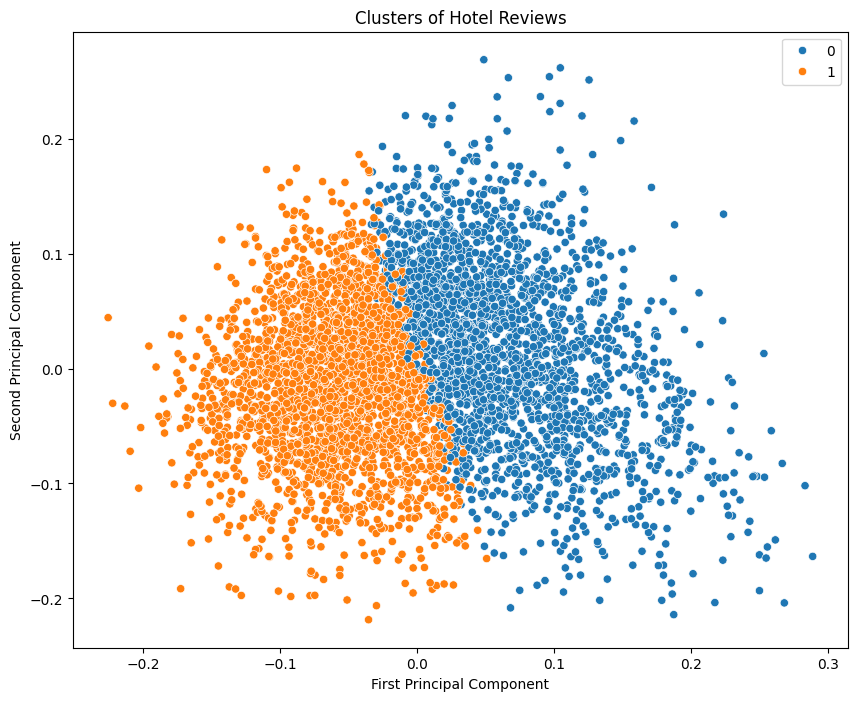


Top words for Cluster 0:
room, hotel, nt, night, stay, staff, day, told, service, desk

Top words for Cluster 1:
room, hotel, nt, nice, great, good, night, stay, bed, view

Sample reviews from Cluster 0:
- world class hotel chose hotel trip girlfriend listed small luxury hotel world registry disappointed ...
- spend couple dollar stayed evening august airport awaiting return flight toronto cancelled placed mo...
- ripoff banys surly staff smelly room noisy conned exchange rate nt respond request explanation nt...

Sample reviews from Cluster 1:
- brrrrr want stay quiet place middle block away bourbon highly recommend dauphine orleans arrived ple...
- nice hotel stayed night leaving cruise price great gave large room queen bed sofa bed hot breakfast ...
- location great hotel stayed charlesmark nov nov night arrived hotel flight early check traveling cou...


In [30]:
c2_df = df.loc[df['cluster'] == 2]

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=2500)
tfidf_matrix = tfidf_vectorizer.fit_transform(c2_df['clean_text'])

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)


c2_df['cluster'] = cluster_labels


pca = PCA(n_components=100)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())


plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=cluster_labels)
plt.title('Clusters of Hotel Reviews')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

feature_names = tfidf_vectorizer.get_feature_names_out()

def get_top_words_per_cluster(cluster_center, feature_names, top_n=10):
    sorted_indices = cluster_center.argsort()[::-1]
    return [feature_names[i] for i in sorted_indices[:top_n]]

for i, center in enumerate(kmeans.cluster_centers_):
    print(f"\nTop words for Cluster {i}:")
    top_words = get_top_words_per_cluster(center, feature_names)
    print(", ".join(top_words))

for i in range(n_clusters):
    print(f"\nSample reviews from Cluster {i}:")
    cluster_reviews = c2_df[c2_df['cluster'] == i]['clean_text'].sample(n=3, random_state=42)
    for review in cluster_reviews:
        print(f"- {review[:100]}...")

In [31]:
c2_df['cluster_2'] = c2_df['cluster']

<ipython-input-31-9c4fb14f179b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2_df['cluster_2'] = c2_df['cluster']


In [32]:
df['cluster_2'] = np.nan
df.loc[df.index.isin(c2_df.index.to_list()), 'cluster_2'] = c2_df['cluster_2']

In [33]:
df

,Review,Rating,clean_text,cluster,cluster_2
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,2,1.0
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,2,0.0
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,2,1.0
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,4,NaN
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,2,1.0
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm star ca...,0,NaN
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,4,NaN
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff nt part...,2,1.0
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,2,0.0


In [34]:
df['predicted_rating'] = 1.0
df.loc[df['cluster_2'] == 0.0, 'predicted_rating'] = 0.0

In [36]:
predictions = df['predicted_rating'].to_numpy()

## Manual review of data

In [37]:
label_1_mask = np.where(predictions == 0, True, False)
df['Review'].to_numpy()[label_1_mask][0]

'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman bu

In [38]:

label_2_mask = np.where(predictions == 1, True, False)
df['Review'].to_numpy()[label_2_mask][2]

"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathrobes feel like rock stars, nice did n't look like sterile chain hotel hotel personality excellent stay,  "

0.8883900248889757


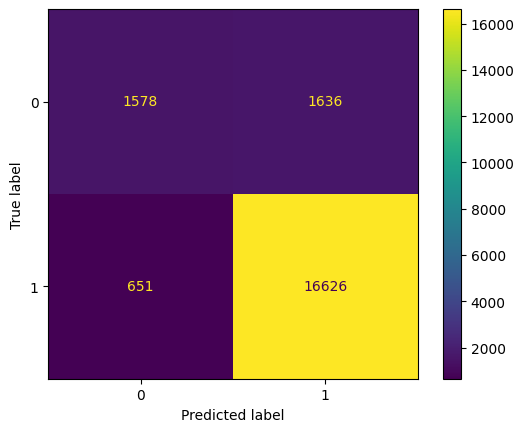

In [39]:



predicted_label = df['predicted_rating'].to_list()
ratings = df['Rating'].to_numpy()
truth = np.where(ratings >= 3, 1, 0)
accuracy = accuracy_score(truth, predicted_label)
ConfusionMatrixDisplay.from_predictions(truth, predicted_label)
print(accuracy)


Performing this 2-stage K-means has led to a big increase in accuracy and large decrease in false positives! We can now segment a large chunk (not all) of the negative reviews.

In [40]:
from wordcloud import WordCloud

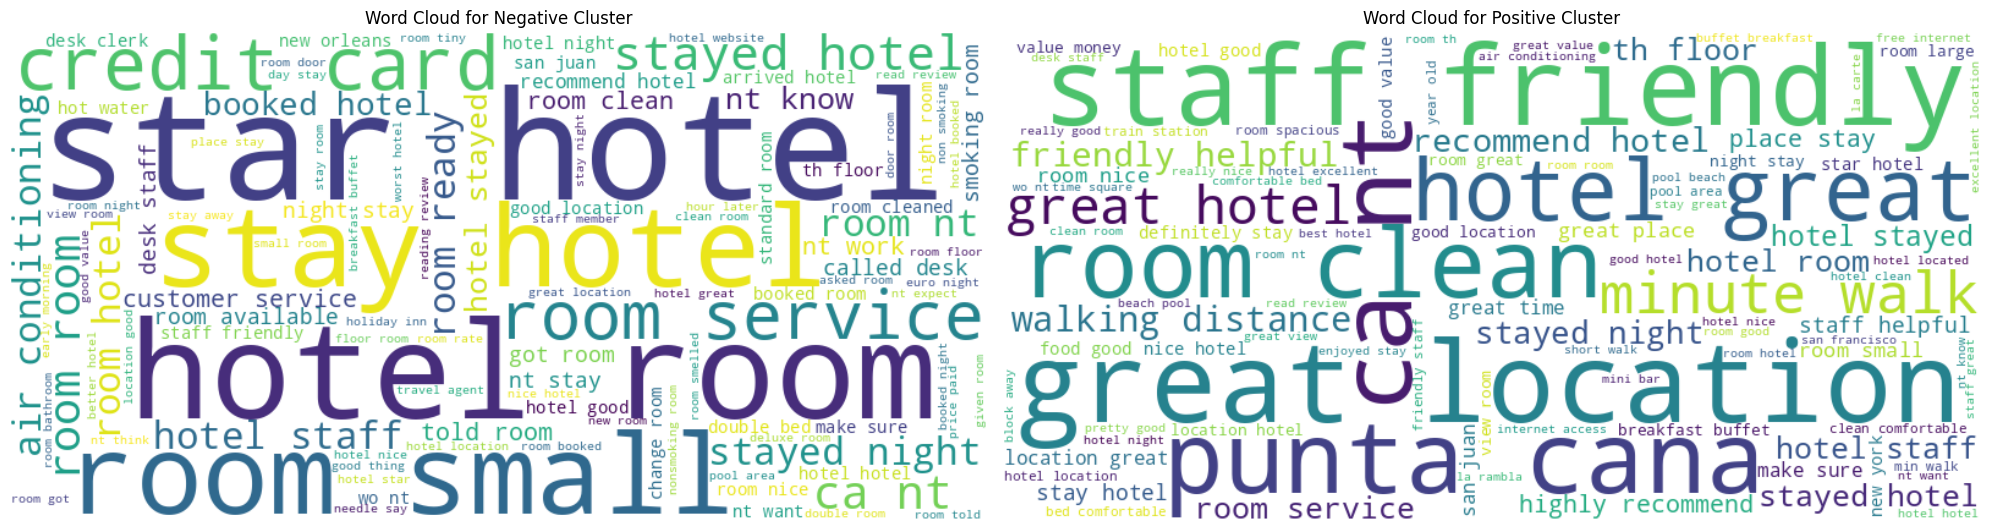

In [43]:

def create_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400,
                              background_color='white',
                              collocation_threshold=2,
                              min_font_size=10).generate(text)
    return wordcloud

label_1_mask = np.where(predictions == 0, True, False)
cluster_1_text = df['clean_text'].to_numpy()[label_1_mask]
label_2_mask = np.where(predictions == 1, True, False)
cluster_2_text = df['clean_text'].to_numpy()[label_2_mask]

text1 = ' '.join(cluster_1_text)
text2 = ' '.join(cluster_2_text)

wordcloud1 = create_wordcloud(text1)
wordcloud2 = create_wordcloud(text2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis('off')
ax1.set_title(f'Word Cloud for Negative Cluster')

ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis('off')
ax2.set_title(f'Word Cloud for Positive Cluster')

plt.tight_layout()
plt.show()

# Conclusion and Results
Our primary goal was to distinguish between positve and negative reviews and determine key themes within them. We found that a two-stage K-means clustering method yielded the most insightful results.

## Key Findings:
  1. Initial Clustering: Grouping the reviews into 5 disctinct categories provided a broad segmentation of the reviews based on their content.
  2. We identified one cluster that had a higher proportion of negative reviews compared to others
  3. By performing a second round of K-means clustering on this negative leaning cluster allowed us to isolate negative reviews.

## Potential Applications:
  1. Hotels could use these insights to target specific areas for improvement
  2. Hotels could track changes in customer satisfaction and the emmergence of new issues

## Future Work:
  - Further refine the classification of reviews with sentiment analysis
  - Experiment with other clustering algorithms
  - Develop system to automatically extract actionable recommendations from the clustered negative reviews.